# <center>Customer Churn Prediction</center>

* `Churn rate` est un indicateur essentiel de la satisfaction du client. `Low churn rates` indique que les clients sont satisfaits.`high churn rates` signifie que les clients vous quittent. 
* Un faible churn rate par mensuel/trimestriel churn s'accumule au fil du temps. 1%  churn rate mensuel se traduit par un churn rate annuel de 12%. 

* Churn vous indique combien de clients existants quittent votre entreprise, et le fait de réduire le taux d'attrition a donc un impact positif important sur vos flux de revenus.

## Exemples de donnees des entreprises telecoms:

* `Donnees Nominatives`: Nom, Prenom, raison sociale, SIRET, Adresse, Numero Telephone, Email, ...

* `Donnees Demographiques`: Genre, Age, Marie ou celibataire, Categorie Socio-Professionnelles, Dependants ou pas, ...

* `Services Souscrits`: Telephone, Internet, Orange Money, Support Technologique, ...

# import libraries

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Import Dataset

L'exemple de données suit une société de télécommunications fictive, Telco. Il s'agit de données sur l'attrition des clients provenant d'IBM Developer Platform. Il comprend une étiquette cible indiquant si le client est parti ou non au cours du dernier mois, et d'autres fonctionnalités dépendantes qui couvrent les données démographiques, les services auxquels chaque client s'est inscrit et les informations sur le compte client. Il contient des données pour 7043 clients, avec 20 fonctionnalités.

In [13]:
data = pd.read_csv('../data/churn_users.csv')
data = data.iloc[:, 1:]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [19]:
#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('\nNombre de lignes: ', df.shape[0])
    print("\nNombre de variables", df.shape[1])
    print("\nNom des variables:")
    print(df.columns.tolist())
    print("\nValeurs manquantes:", df.isnull().sum().values.sum())
    print("\nValeurs uniques:")
    print(df.nunique())
    
dataoveriew(data, 'Aperçu des données')

Aperçu des données:


Nombre de lignes:  5986

Nombre de variables 21

Nom des variables:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valeurs manquantes: 0

Valeurs uniques:
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64


Les données sont reparties en deux catégories

* 17 Variables catégorielles :

    * `CustomerID` : ID client unique pour chaque client

    * `genre` : Si le client est un homme ou une femme (male, female)

    * `SeniorCitizen` : Si le client est un senior ou non (1, 0)

    * `Partner` : Si le client a un partenaire ou non (Yes, No)

    * `Dependent` : Si le client a des personnes à charge ou non (Yes, No)

    * `PhoneService `: si le client dispose d'un service téléphonique ou non (Yes, No)

    * `MultipeLines` : Si le client a plusieurs lignes ou non Yes, No, No phone service)

    * `InternetService` : fournisseur de services Internet du client (DSL, Fiber optic, No)

    * `OnlineSecurity` : si le client dispose ou non d'une sécurité en ligne (Yes, No, No internet service)

    * `OnlineBackup` : Si le client dispose ou non d'une sauvegarde en ligne (Yes, No, No internet service)

    * `DeviceProtection` : si le client dispose ou non d'une protection d'appareil (Yes, No, No internet service)

    * `TechSupport` : Si le client dispose d'un support technique ou non (Yes, No, No internet service)

    * `StreamingTV` : si le client dispose ou non de la télévision en streaming (Yes, No, No internet service)

    * `StreamingMovies` : si le client a des films en streaming ou non (Yes, No, No internet service)

    * `Contract` : la durée du contrat du client (Month-to-month, One year, Two years)

    * `PaperlessBilling` : la durée du contrat du client Month-to-month, One year, Two years)

    * `PaymentMethod` : Mode de paiement du client (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))



* 3 Variables numériques:

    * `Tenure`: Nombre de mois pendant lesquels le client est resté dans l'entreprise.
    * `MonthlyCharges`: Le montant facturé au client mensuellement.
    * `TotalCharges`: Le montant total facturé au client


* Prediction feature:

    * `Churn`: Si le client s'est désabonné ou non (Yes, No)


 Ces variables peuvent être egalement etre divisé en:


* Informations démographiques sur les clients:

    * gender , SeniorCitizen , Partner , Dependents


* Services auxquels chaque client s'est inscrit:

    * PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,


* Informations sur le compte client:

    * tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

# Explore Target variable

In [226]:
target_instance = data["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution de Churn')
fig.show()

Nous essayons de prédire les utilisateurs qui ont quitté l'entreprise au cours d'une période donnée. C'est un problème de classification binaire avec une cible déséquilibrée.

* Churn: Non - 73.5 %

* Churn: Oui – 26,5 %

# Explore categorical variables.

In [22]:
# Defining bar chart function
def bar(df, feature):
    #Groupby the categorical variable
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate par {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Pourcentage de la distribution de {cat_str} de {feature} sont respectivement <br>{num_str} ',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [23]:
#Gender variable plot
bar(data, 'gender')
#SeniorCitizen variable plot 
data.loc[data.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data.loc[data.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar(data, 'SeniorCitizen')
#Partner variable plot
bar(data, 'Partner')
#Dependents variable plot
bar(data, 'Dependents')

`Analyse démographique Aperçu`: Le Gender et le partner sont répartis de manière égale avec des pourcentages approximatifs. La différence de churn rate est légèrement plus élevée chez les hommes, mais la petite différence peut être ignorée.
La proportion de résiliations est plus élevée chez les jeunes clients (pour lesquels SeniorCitizen est No), les clients sans partenaire et les clients sans personne à charge.
Cette analyse de la section démographique des données met en évidence le fait que les seniors sans partenaire ni personne à charge constituent un segment particulier de clients susceptibles de se désabonner. 

In [24]:
bar(data, 'PhoneService')
bar(data, 'MultipleLines')
bar(data, 'InternetService')
bar(data, 'OnlineSecurity')
bar(data, 'OnlineBackup')
bar(data, 'DeviceProtection')
bar(data, 'TechSupport')
bar(data, 'StreamingTV')
bar(data, 'StreamingMovies')

`Services auxquels chaque client a souscrit insight`: Ces catégories de variables présentent des variations significatives de leurs valeurs. Si un client n'a pas de service téléphonique, il ne peut pas avoir plusieurs lignes. Environ 90,3 % des clients disposent d'un service téléphonique et ont un taux de churn plus élevé. Les clients qui disposent d'un service internet en fibre optique sont plus susceptibles de changer de fournisseur, ce qui peut être dû à des prix élevés, à la concurrence, au service à la clientèle et à bien d'autres raisons. Le service de fibre optique est beaucoup plus cher que le service DSL, ce qui peut être l'une des raisons pour lesquelles les clients changent de fournisseur. Les clients qui bénéficient d'une sécurité en ligne, d'une sauvegarde en ligne, d'une protection des appareils et d'une assistance technique sont moins susceptibles de changer d'opérateur. Le service de streaming n'est pas un facteur prédictif de désabonnement car il est réparti uniformément entre les options "oui" et "non".



In [25]:
# Time to explore payment features.

bar(data, 'Contract')
bar(data, 'PaperlessBilling')
bar(data, 'PaymentMethod')

`Paiement`: Plus le contrat est court, plus le taux de résiliation est élevé, car ceux qui ont des contrats plus longs se heurtent à des obstacles supplémentaires lorsqu'ils résilient leur contrat prématurément. Cela explique clairement la motivation des entreprises à entretenir des relations à long terme avec leurs clients. Le taux de résiliation est plus élevé pour les clients qui ont opté pour la facturation sans papier, soit environ 59,2 % des clients. Les clients qui paient par chèque électronique sont plus susceptibles de se désabonner et ce type de paiement est plus courant que les autres.

# Explore numériques variables

In [26]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [233]:
# Let’s catch the error
try:
    data['TotalCharges'] = data['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ''


Cela indique que certaines valeurs vides sont stockées sous forme d'espaces vides. Transformons la fonctionnalité dans un format numérique tout en assimilant ces espaces de chaîne vides à NaN comme suit :

In [27]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [28]:
# Defining the histogram plotting function
def hist(feature):
    group_df = data.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Frequence du churn rate par rapport a {feature} ', color_discrete_sequence=["green", "red"])
    fig.show()

In [29]:
# Running the functions on the numeric features as follows:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

`Informations sur le compte client` : L'histogramme de la durée d'utilisation est à juste titre asymétrique et montre que la majorité des clients n'ont fait partie de l'entreprise de télécommunications que pendant les premiers mois (0-9 mois) et que le taux de désabonnement le plus élevé se situe également au cours de ces premiers mois (0-9 mois). 75 % des clients qui finissent par quitter l'entreprise de télécommunications le font au cours des 30 premiers mois. L'histogramme des frais mensuels montre que les clients dont les frais mensuels sont les plus élevés ont un taux de désabonnement plus élevé (ce qui suggère que les réductions et les promotions peuvent être une raison attrayante pour les clients de rester). La tendance des frais totaux est assez évidente en raison de la variation de la fréquence. Répartissons les caractéristiques numériques en trois sections basées sur les quantiles (faible, moyen et élevé) afin d'en tirer davantage d'informations.

In [30]:
# Create an empty dataframe
bin_df = pd.DataFrame()

# Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(data['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(data['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(data['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = data['Churn']

#Plot the bar chart of the binned variables
bar(bin_df, 'tenure_bins')
bar(bin_df, 'MonthlyCharges_bins')
bar(bin_df, 'TotalCharges_bins')

Sur la base de la répartition en binômes, les binômes à faible durée d'occupation et à frais mensuels élevés présentent des taux de résiliation plus élevés, comme le confirme l'analyse précédente. En revanche, le taux de résiliation est plus élevé dans le cas de la tranche de frais totaux peu élevés.

# Data preprocessing

Dans cette section, nous obtiendrons davantage d'informations et nous convertirons les données en une représentation de données adaptée à divers algorithmes d'apprentissage automatique.



In [31]:
# The customerID column isnt useful as the feature is used for identification of customers. 
data.drop(["customerID"],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
data['Churn'] = data[['Churn']].apply(binary_map)

# Encoding gender category
data['gender'] = data['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data[binary_list] = data[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data = pd.get_dummies(data, drop_first=True)

In [32]:
# Checking the correlation between features
corr = data.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

La corrélation est un terme statistique qui mesure la relation linéaire entre deux variables. Les caractéristiques ayant une forte corrélation sont plus linéairement dépendantes et ont presque le même effet sur la variable dépendante. Ainsi, lorsque deux caractéristiques ont une forte corrélation, nous pouvons abandonner l'une d'entre elles. Par conséquent, lorsque deux caractéristiques ont une forte corrélation, nous pouvons supprimer l'une d'entre elles. Dans notre cas, nous pouvons abandonner les caractéristiques à forte corrélation comme `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` et `StreamingMovies`.

La prédiction du désabonnement est un problème de classification binaire, car les clients se désabonnent ou sont conservés au cours d'une période donnée. Deux questions doivent être résolues pour guider l'élaboration d'un modèle :

## Generalized linear model (GLM) to gain some statistics of the respective features with the target.

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data.columns]

#Effect the change to the dataframe column names
data.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 5986
Model:                            GLM   Df Residuals:                     5962
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.6
Date:                Sat, 01 Apr 2023   Deviance:                       4989.2
Time:                        12:13:07   Pearson chi2:                 6.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2762
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Si la valeur p value est inférieure à 0,05, cela signifie que la fonctionnalité affecte le taux de désabonnement de manière statistiquement significative. Voici quelques exemples :

* SeniorCitizen
* Tenure
* Contract
* PaperlessBillings etc.

In [34]:
np.exp(res.params)

Intercept                                2.147097
gender                                   0.961041
SeniorCitizen                            1.206286
Partner                                  1.024052
Dependents                               0.894926
tenure                                   0.943569
PhoneService                             1.537689
PaperlessBilling                         1.366105
MonthlyCharges                           0.963161
TotalCharges                             1.000316
MultipleLines_No_phone_service           1.396314
MultipleLines_Yes                        1.548339
InternetService_Fiber_optic              5.287252
InternetService_No                       0.785439
OnlineSecurity_No_internet_service       0.785439
OnlineSecurity_Yes                       0.763908
OnlineBackup_No_internet_service         0.785439
OnlineBackup_Yes                         0.986037
DeviceProtection_No_internet_service     0.785439
DeviceProtection_Yes                     1.115398


In [35]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data['tenure'] = sc.fit_transform(data[['tenure']])
data['MonthlyCharges'] = sc.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = sc.fit_transform(data[['TotalCharges']])

# Création d'un modèle de base

In [36]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

In [37]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [38]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.8123608017817372
precision:  0.654891304347826
recall:  0.5343680709534369
f1_score:  0.8056609922972405


In [39]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

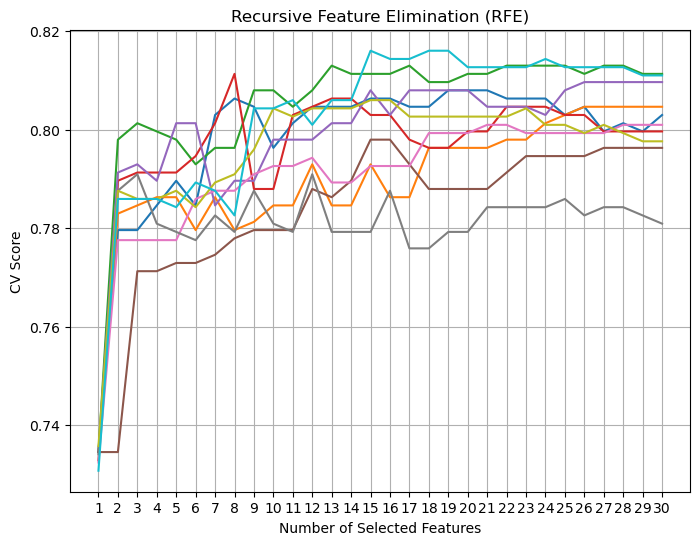

The optimal number of features: 25


In [42]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [41]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (5986, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (5986, 25)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', '

In [43]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

In [44]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.8095768374164811
precision:  0.646112600536193
recall:  0.5343680709534369
f1_score:  0.8032470759546845


In [45]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8045657015590201
precision:  0.6533742331288344
recall:  0.4722838137472284
f1_score:  0.793184566865571


In [46]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7884187082405345
precision:  0.5977961432506887
recall:  0.4811529933481153
f1_score:  0.7803330612260464


In [47]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7299554565701559
precision:  0.4657258064516129
recall:  0.5121951219512195
f1_score:  0.7340743443050733


In [48]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6536748329621381
precision:  0.41139896373056994
recall:  0.8802660753880266
f1_score:  0.6756285783749346


In [50]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
# summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
params = result.best_params_

#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)

/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/habibmbow/opt/anaconda3

Logistic Regression Classification
accuracy:  0.8106904231625836
precision:  0.6472148541114059
recall:  0.541019955654102
f1_score:  0.8047651103029659


/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/habibmbow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

Le modèle s'est légèrement amélioré. Enregistrons le modèle et commençons le déploiement de notre application de prédiction de désabonnement à l'aide de ce modèle.

In [52]:
#Saving best model 
import joblib
#Sava the model to disk
filename = '../save_model/model.sav'
joblib.dump(log_model, filename)

['../save_model/model.sav']